# Analisis Netflix Titles Dataset dengan Python


# Import library yang diperlukan


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dan Eksplorasi Data Awal

In [8]:
# Membaca dataset
df = pd.read_csv('netflix_titles.csv')

# Menampilkan informasi dataset
print("Informasi Dataset:")
df.info()

# Menampilkan 5 data pertama
print("\nLima Data Pertama:")
df.head()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Lima Data Pertama:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 2. Feature Engineering

## 2.1 Ekstraksi Tahun dari Release Date

In [9]:
# Mengkonversi date_added ke datetime dengan penanganan kesalahan
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Membuat kolom baru untuk tahun, bulan, dan hari
df['release_year'] = df['date_added'].dt.year
df['release_month'] = df['date_added'].dt.month
df['release_day'] = df['date_added'].dt.day


## 2.2 Kategorisasi Durasi

In [10]:
def categorize_duration(duration):
    if pd.isna(duration):
        return 'Unknown'
    if 'Season' in duration:
        seasons = int(duration.split()[0])
        if seasons == 1:
            return 'Single Season'
        elif seasons <= 3:
            return 'Short Series'
        else:
            return 'Long Series'
    else:
        minutes = int(duration.split()[0])
        if minutes <= 60:
            return 'Short'
        elif minutes <= 120:
            return 'Medium'
        else:
            return 'Long'

df['duration_category'] = df['duration'].apply(categorize_duration)


# 3. Exploratory Data Analysis (EDA)

## 3.1 Analisis Statistik Deskriptif

In [11]:
# Statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
df.describe()

# Menghitung jumlah nilai null
print("\nNilai Null per Kolom:")
df.isnull().sum()


Statistik Deskriptif:

Nilai Null per Kolom:


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,98
rating,4
duration,3


## 3.2 Visualisasi Data

### 3.2.1 Distribusi Tipe Konten

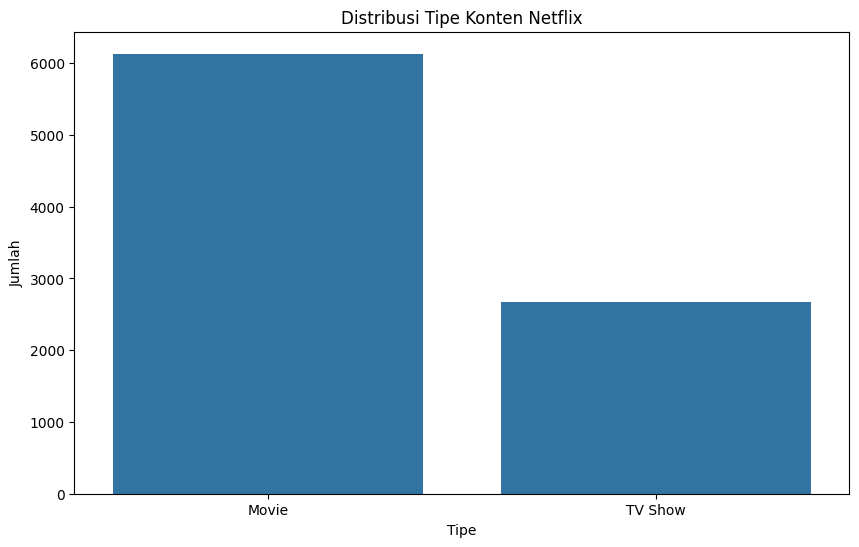

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribusi Tipe Konten Netflix')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

### 3.2.2 Trend Penambahan Konten per Tahun

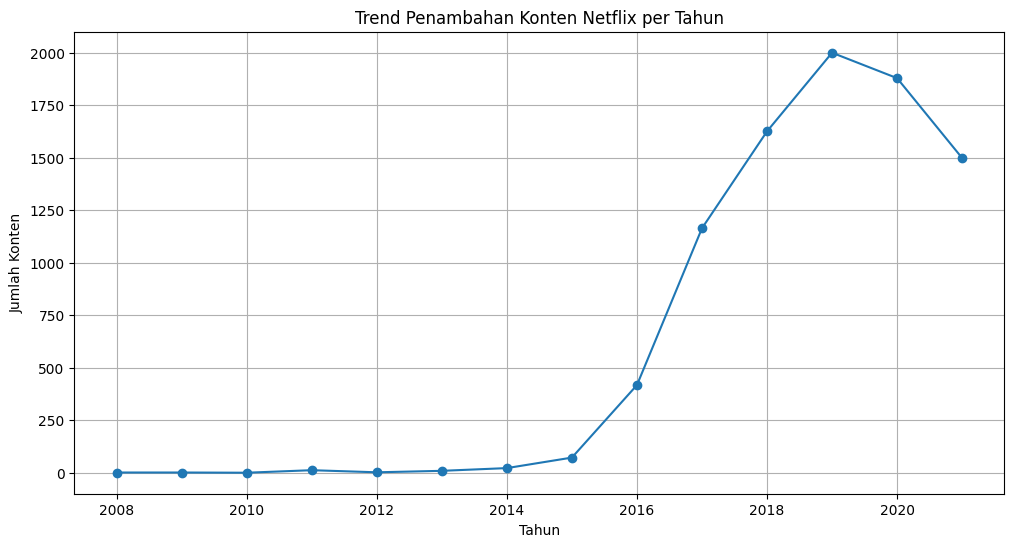

In [13]:
yearly_content = df.groupby('release_year').size()
plt.figure(figsize=(12, 6))
yearly_content.plot(kind='line', marker='o')
plt.title('Trend Penambahan Konten Netflix per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.grid(True)
plt.show()

### 3.2.3 Distribusi Kategori Durasi

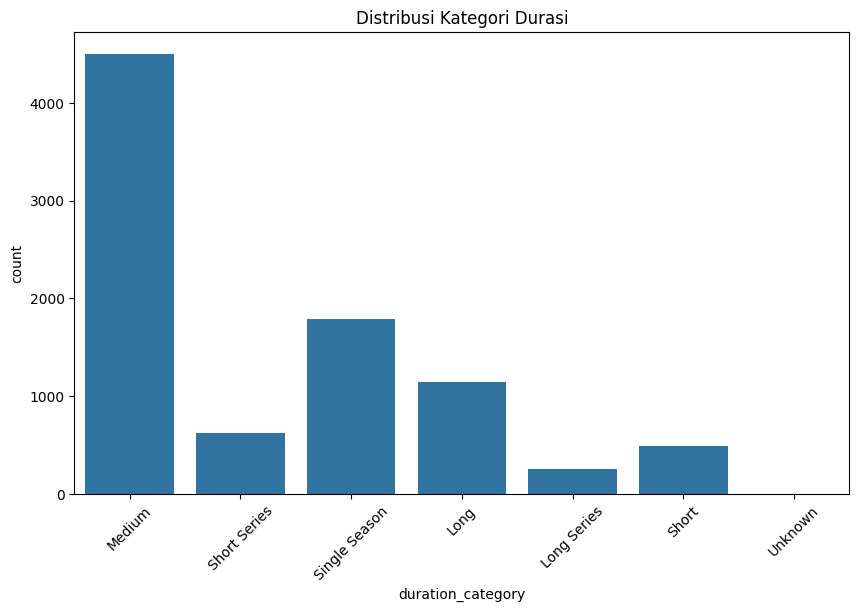

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='duration_category')
plt.title('Distribusi Kategori Durasi')
plt.xticks(rotation=45)
plt.show()

## 3.3 Analisis Rating

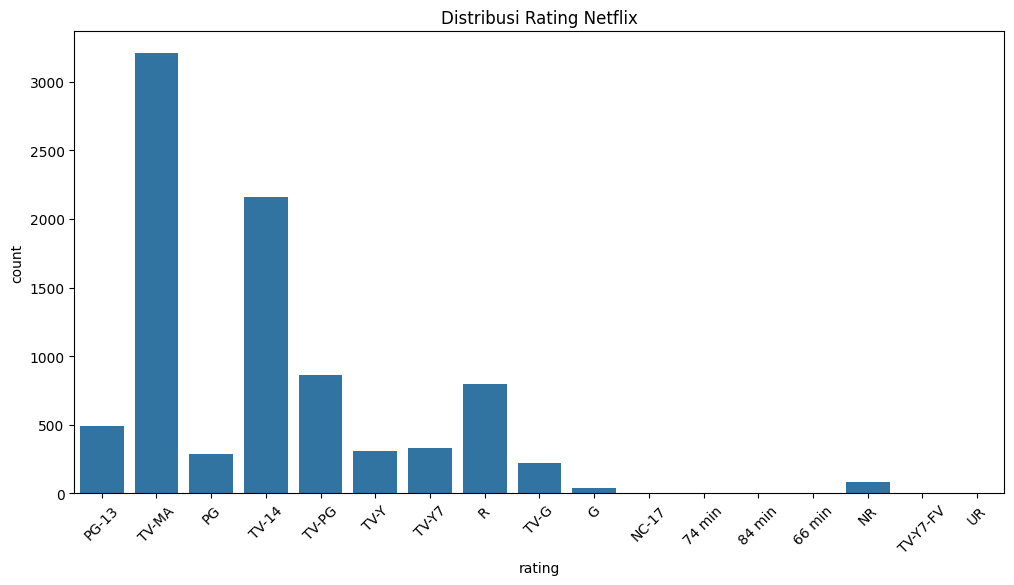

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating')
plt.title('Distribusi Rating Netflix')
plt.xticks(rotation=45)
plt.show()




## 3.4 Analisis Genre

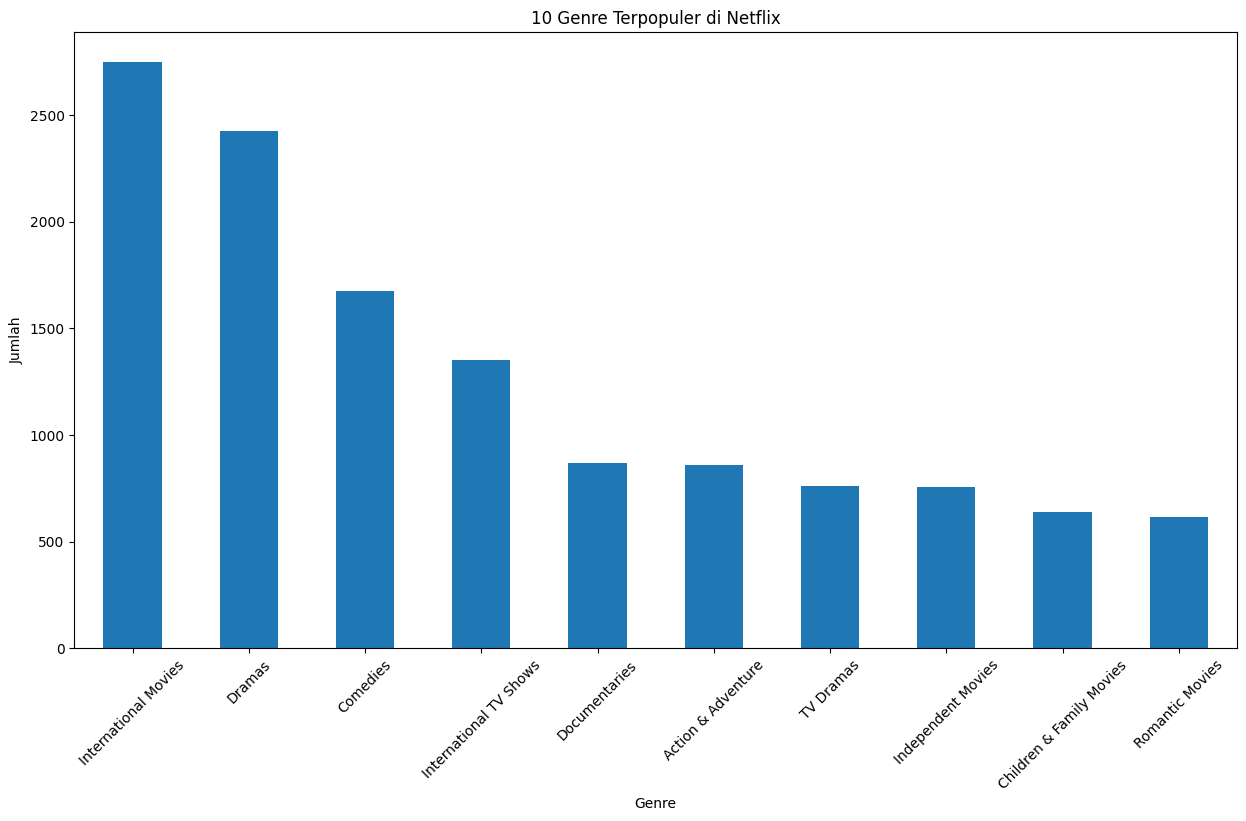

In [16]:
# Memisahkan genre menjadi list
df['listed_in'] = df['listed_in'].str.split(',')

# Menghitung frekuensi genre
genre_counts = pd.Series([genre.strip() for genres in df['listed_in'].dropna()
                         for genre in genres]).value_counts()

plt.figure(figsize=(15, 8))
genre_counts.head(10).plot(kind='bar')
plt.title('10 Genre Terpopuler di Netflix')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# 4. Penjelasan Persamaan Matematika
1. Perhitungan Statistik Deskriptif:
  
  - Mean (μ) = Σx/n

  - Standar Deviasi (σ) = √(Σ(x-μ)²/n)

  - Dimana x adalah nilai data dan n adalah jumlah data

2. Normalisasi Data (jika diperlukan):
   - Z-score = (x - μ)/σ
   - Min-Max Scaling = (x - min(x))/(max(x) - min(x))

3. Perhitungan Persentase:
   - Persentase = (Jumlah Kategori/Total) × 100




# 5. Kesimpulan
- Analisis ini memberikan pemahaman mendalam tentang karakteristik konten Netflix dan tren perilisannya.
- Feature engineering yang dilakukan membantu mengungkapkan pola-pola tersembunyi dalam data.